## Import Libs

In [ ]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf "/content/drive/MyDrive/AIFORTHAI-LST20Corpus.tar.gz" -C "/content"

Streaming output truncated to the last 5000 lines.
LST20_Corpus/train/._T12371.txt
LST20_Corpus/train/T12371.txt
LST20_Corpus/train/._T11678.txt
LST20_Corpus/train/T11678.txt
LST20_Corpus/train/._T10566.txt
LST20_Corpus/train/T10566.txt
LST20_Corpus/train/._T00775.txt
LST20_Corpus/train/T00775.txt
LST20_Corpus/train/._T12417.txt
LST20_Corpus/train/T12417.txt
LST20_Corpus/train/._T12403.txt
LST20_Corpus/train/T12403.txt
LST20_Corpus/train/._T10214.txt
LST20_Corpus/train/T10214.txt
LST20_Corpus/train/._T01319.txt
LST20_Corpus/train/T01319.txt
LST20_Corpus/train/._T00761.txt
LST20_Corpus/train/T00761.txt
LST20_Corpus/train/._T01457.txt
LST20_Corpus/train/T01457.txt
LST20_Corpus/train/._T00991.txt
LST20_Corpus/train/T00991.txt
LST20_Corpus/train/._T11644.txt
LST20_Corpus/train/T11644.txt
LST20_Corpus/train/._T00749.txt
LST20_Corpus/train/T00749.txt
LST20_Corpus/train/._T13053.txt
LST20_Corpus/train/T13053.txt
LST20_Corpus/train/._T11122.txt
LST20_Corpus/train/T11122.txt
LST20_Corpus/train/

In [ ]:
def createDataset(data_list):
    dataset = []
    file_name = []
    for txt in tqdm(data_list):
        data = createData(txt)
        dataset.append(data)
        name = txt.split("/")
        file_name.append(name[-1])
    return [dataset, file_name]

In [ ]:
def createData(txt):
    data = ""
    f = open(txt, "r", encoding="utf-8")
    for line in f:
        line = line.strip()

        if line == "":
            continue
        
        line = line.split("\t")

        if line[0] == "_":
            data = data + " "
        else:
            data = data + line[0]
    f.close()
    return data

In [ ]:
train_directory = "/content/LST20_Corpus/train"
train_list = sorted(glob.glob(train_directory+'/*'))

test_directory = "/content/LST20_Corpus/test"
test_list = sorted(glob.glob(test_directory+'/*'))

eval_directory = "/content/LST20_Corpus/eval"
eval_list = sorted(glob.glob(eval_directory+'/*'))

In [ ]:
train_dataset = createDataset(train_list)
test_dataset = createDataset(test_list)
eval_dataset = createDataset(eval_list)

100%|██████████| 474/474 [00:00<00:00, 2151.85it/s]


## Data Cleaning

### Substitute Strings in Genre & Remove duplicated genre

In [ ]:
genre_dt = pd.read_csv("/content/LST20_Corpus/genres.txt", delimiter="\t", header=None, names=["file_name", "genre"])
genre_dt["genre"] = genre_dt["genre"].apply(lambda x: "international" if x == "inter" else x)
display(genre_dt.head())
display(genre_dt.describe())

,file_name,genre
0,T00126.txt,politics
1,T00127.txt,C&A
2,T00128.txt,C&A
3,T00129.txt,general
4,T00130.txt,C&A


,file_name,genre
count,4751,4751
unique,4751,15
top,T00642.txt,politics
freq,1,1473


In [ ]:
unique_genre = genre_dt.genre.unique()

genre_2_num_map = dict(zip(unique_genre, range(len(unique_genre))))
num_2_genre_map = dict(zip(range(len(unique_genre)), unique_genre))

number_of_genre = len(genre_2_num_map)
print(number_of_genre)

print("Create Mappings")
display(genre_2_num_map)
display(num_2_genre_map)

15
Create Mappings


{'C&A': 1,
 'STE': 5,
 'culture': 4,
 'development': 12,
 'disaster': 10,
 'economics': 3,
 'entertainment': 11,
 'environment': 7,
 'general': 2,
 'health': 9,
 'international': 6,
 'politics': 0,
 'royal': 14,
 'sports': 13,
 'weather': 8}

{0: 'politics',
 1: 'C&A',
 2: 'general',
 3: 'economics',
 4: 'culture',
 5: 'STE',
 6: 'international',
 7: 'environment',
 8: 'weather',
 9: 'health',
 10: 'disaster',
 11: 'entertainment',
 12: 'development',
 13: 'sports',
 14: 'royal'}

In [ ]:
genre_dt["genre"] = genre_dt["genre"].apply(lambda x: genre_2_num_map[x])
display(genre_dt.head())
display(genre_dt.describe())

,file_name,genre
0,T00126.txt,0
1,T00127.txt,1
2,T00128.txt,1
3,T00129.txt,2
4,T00130.txt,1


,genre
count,4751.000000
mean,4.362240
std,4.733744
min,0.000000
25%,0.000000
50%,3.000000
75%,9.000000
max,14.000000


In [ ]:
# file_name_2_genre_map = dict()

# f = open("/content/LST20_Corpus/genres.txt", "r", encoding="utf8")

# for line in f:
#     line = line.strip()
#     line = line.split("\t")
#     file_name_2_genre_map[line[0]] = genre_2_num_map[line[1]]

# f.close()

In [ ]:
train_df = pd.DataFrame(list(zip(train_dataset[1], train_dataset[0])), columns=["file_name", "sentence"])
train_df = train_df.merge(genre_dt, left_on="file_name", right_on="file_name")

display(train_df.head())
display(train_df.describe())

,file_name,sentence,genre
0,T00126.txt,สุรยุทธ์ยันปฏิเสธลงนาม MOU กับอียูไม่กระทบสัมพ...,0
1,T00127.txt,บุกยึดไม้เถื่อนอดีตส.ส.บุรีรัมย์เตรียมสร้างคฤห...,1
2,T00128.txt,"ผกก.แจง""สุไฮมี""ที่ถูกวิสามัญ เป็นหนึ่งในมือวาง...",1
3,T00129.txt,เฒ่าวัย 72 ร้องถูกรัฐยึดที่ทำกินที่มีสค.1-เป็น...,2
4,T00130.txt,เมียสาวใหญ่สุดแค้นผัวนอกใจมอมเหล้า-เฉือนเจ้าโล...,1


,genre
count,3794.000000
mean,4.356879
std,4.732741
min,0.000000
25%,0.000000
50%,3.000000
75%,9.000000
max,14.000000


In [ ]:
train_df.shape

(3794, 3)

In [ ]:
test_df = pd.DataFrame(list(zip(test_dataset[1], test_dataset[0])), columns=["file_name", "sentence"])
test_df = test_df.merge(genre_dt, left_on="file_name", right_on="file_name")

display(test_df.head())
display(test_df.describe())

,file_name,sentence,genre
0,T11046.txt,จีน-อินเดียเสี่ยงสูญเสียจากภัยธรรมชาติมากสุดเจ...,10
1,T11058.txt,เกิดเหตุพายุพัดถล่มจีน ทำให้มีผู้เสียชีวิตอย่า...,10
2,T11225.txt,เชื่อนจีน 40% เสี่ยงถล่ม หลังสร้างไม่นานปักกิ่...,10
3,T11608.txt,ร่างของหลวงปู่ทิม เกจิชื่อดังแห่งวัดพระขาว จ.พ...,4
4,T11652.txt,ก.เกษตรฯ เตรียมจัดงานประกวดโครงการส่งเสริมเอกล...,4


,genre
count,483.000000
mean,4.397516
std,4.733933
min,0.000000
25%,0.000000
50%,3.000000
75%,9.000000
max,14.000000


In [ ]:
test_df.shape

(483, 3)

In [ ]:
eval_df = pd.DataFrame(list(zip(eval_dataset[1], eval_dataset[0])), columns=["file_name", "sentence"])
eval_df = eval_df.merge(genre_dt, left_on="file_name", right_on="file_name")

display(eval_df.head())
display(eval_df.describe())

,file_name,sentence,genre
0,T01608.txt,สลดผัวเมียเฒ่าถูกไฟช็อตกอดกันตาย สังเวยฝนตก-น้...,10
1,T01738.txt,Office of His Majesty's Principal Private Secr...,14
2,T01739.txt,Office of His Majesty's Principal Private Secr...,14
3,T01740.txt,Office_of_His_Majesty's_Principal_Private_Secr...,14
4,T10077.txt,"พระราชทานดอกไม้เยี่ยม""เอ-อนันต์""ที่ศูนย์การแพท...",14


,genre
count,474.000000
mean,4.369198
std,4.751408
min,0.000000
25%,0.000000
50%,3.000000
75%,9.000000
max,14.000000


In [ ]:
eval_df.shape

(474, 3)

In [ ]:
train_df.shape[0] + test_df.shape[0] + eval_df.shape[0]

4751

### Visualize Class Count

In [ ]:
def plot(label, count):
    fig, ax = plt.subplots()
    ind = np.arange(len(count))
    rects1 = ax.bar(ind, count, 0.5)

    ax.set_ylabel('Count')
    ax.set_title('Count for each class')
    ax.set_xticks(ind)
    ax.set_xticklabels(label)

    plt.show()

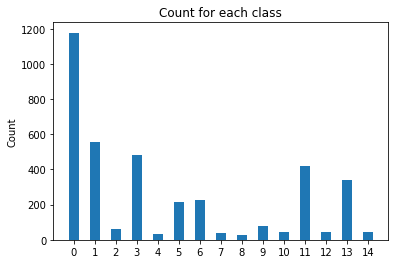

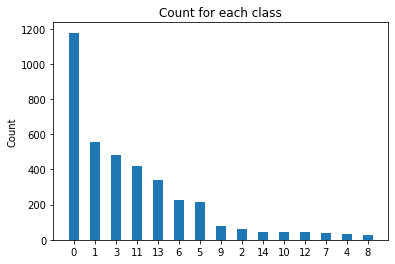

In [ ]:
# Visualize Class Count on Training Dataset
train_np = train_df.to_numpy()

genre, count = np.unique(train_np[:, 2], return_counts=True)
plot(genre, count)

# pack the label and count together
bundle = list(zip(genre, count))
# sort them by count
bundle = sorted(bundle, key=lambda e: e[1], reverse=True) 
# unpack the values
genre, count = zip(*bundle)

plot(genre, count)

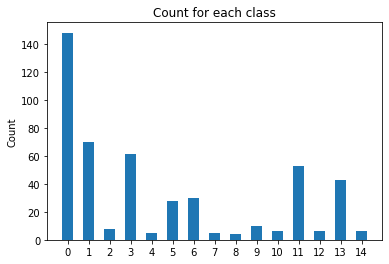

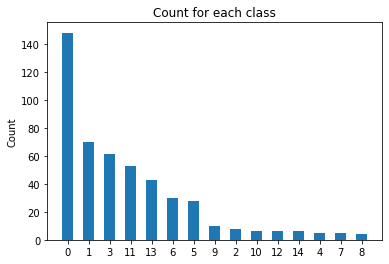

In [ ]:
# Visualize Class Count on Testing Dataset
test_np = test_df.to_numpy()

genre, count = np.unique(test_np[:, 2], return_counts=True)
plot(genre, count)

# pack the label and count together
bundle = list(zip(genre, count))
# sort them by count
bundle = sorted(bundle, key=lambda e: e[1], reverse=True) 
# unpack the values
genre, count = zip(*bundle)

plot(genre, count)

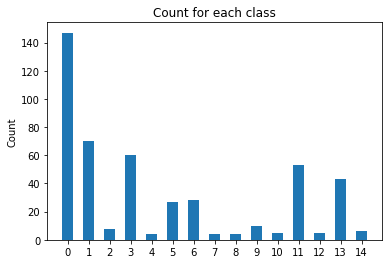

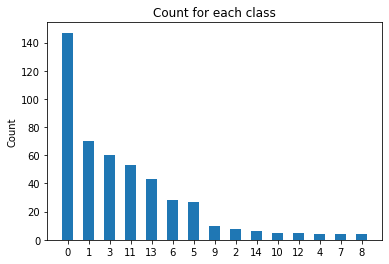

In [ ]:
# Visualize Class Count on Testing Dataset
eval_np = eval_df.to_numpy()

genre, count = np.unique(eval_np[:, 2], return_counts=True)
plot(genre, count)

# pack the label and count together
bundle = list(zip(genre, count))
# sort them by count
bundle = sorted(bundle, key=lambda e: e[1], reverse=True) 
# unpack the values
genre, count = zip(*bundle)

plot(genre, count)

## Preprocessing data for Keras

### Tokenize

In [ ]:
!pip install pythainlp

     |████████████████████████████████| 10.6MB 6.8MB/s 
     |████████████████████████████████| 747kB 49.6MB/s 


In [ ]:
# !pip install tensorflow deepcut

In [ ]:
!pip install attacut

     |████████████████████████████████| 1.3MB 8.1MB/s 
     |████████████████████████████████| 481kB 34.7MB/s 
     |████████████████████████████████| 645kB 34.9MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=9850ef1aedbc1c740c9ba99135d21bcfa0b6f4fad54799d02faac368a7c40fb3
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built fire
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from tensorflow.keras.utils import to_categorical
from pythainlp.tokenize import word_tokenize
import re

In [ ]:
def tokenizeWithNewmm(text):
    text = re.sub(" ", "", text)
    tokens = word_tokenize(text, engine="newmm")
    return tokens

In [ ]:
def tokenizeWithAttacut(text):
    text = re.sub(" ", "", text)
    # tokens = deepcut.tokenize(text)
    tokens = word_tokenize(text, engine="attacut")
    return tokens

In [ ]:
def sentencize(tokens):
    sentences = []
    length = len(tokens)
    l = 0
    while l+256 <= length:
        tmp = tokens[l: l+256]
        sentences.append(tmp)
        l += 64

    if l < length:
        tmp = tokens[l:]
        sentences.append(tmp)

    return sentences

In [ ]:
train_df['tokens'] = train_df['sentence'].apply(tokenizeWithNewmm)
train_df['sentence_token'] = train_df['tokens'].apply(sentencize)

out = []
for i, row in train_df[["sentence_token", "genre"]].iterrows():
    for piece in row[0]:
        out.append([piece, row[1]])

new_train_df = pd.DataFrame(out, columns = ["tokens", "genre"])

display(new_train_df.head())
display(new_train_df.describe())

,tokens,genre
0,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, MOU, กับ, อียู,...",0
1,"[)พ, ล., อ., สุรยุทธ์, จุ, ลา, นนท์, กล่าว, รา...",0
2,"[ของ, ความตกลง, ร่วมมือ, กัน, มี, 2, ลักษณะ, ค...",0
3,"[บุก, ยึด, ไม้, เถื่อน, อดีต, ส.ส., บุรีรัมย์,...",1
4,"[ณ์, ภู่, ไพ, จิต, กุล, รอง, ผบ, ก., ภ., จว., ...",1


,genre
count,24346.000000
mean,3.774994
std,4.841168
min,0.000000
25%,0.000000
50%,1.000000
75%,7.000000
max,14.000000


In [ ]:
test_df['tokens'] = test_df['sentence'].apply(tokenizeWithNewmm)
test_df['sentence_token'] = test_df['tokens'].apply(sentencize)

out = []
for i, row in test_df[["sentence_token", "genre"]].iterrows():
    for piece in row[0]:
        out.append([piece, row[1]])

new_test_df = pd.DataFrame(out, columns = ["tokens", "genre"])

display(new_test_df.head())
display(new_test_df.describe())

,tokens,genre
0,"[จีน, -, อินเดีย, เสี่ยง, สูญเสีย, จาก, ภัยธรร...",10
1,"[เกิดเหตุ, พายุ, พัด, ถล่ม, จีน, ทำให้, มี, ผู...",10
2,"[เชื่อ, น, จีน, 40, %, เสี่ยง, ถล่ม, หลัง, สร้...",10
3,"[ความ, วิ, ตกว่า, เขื่อน, ในประเทศ, จีน, กว่า,...",10
4,"[ร่าง, ของ, หลวงปู่, ทิม, เกจิ, ชื่อดัง, แห่ง,...",4


,genre
count,1448.000000
mean,4.488260
std,4.704671
min,0.000000
25%,0.000000
50%,3.000000
75%,9.000000
max,14.000000


In [ ]:
eval_df['tokens'] = eval_df['sentence'].apply(tokenizeWithNewmm)
eval_df['sentence_token'] = eval_df['tokens'].apply(sentencize)

out = []
for i, row in eval_df[["sentence_token", "genre"]].iterrows():
    for piece in row[0]:
        out.append([piece, row[1]])

new_eval_df = pd.DataFrame(out, columns = ["tokens", "genre"])

display(new_eval_df.head())
display(new_eval_df.describe())

,tokens,genre
0,"[สลด, ผัวเมีย, เฒ่า, ถูก, ไฟ, ช็อต, กอด, กัน, ...",10
1,"[ดิน, โคลน, ถล่ม, ไม่, ซ้ำรอย, กรณี, น้ำ, ก้อ,...",10
2,"[ลาด, อ., วัด, โบสถ์, จึง, รุด, ไป, ตรวจสอบ, ย...",10
3,"[นาย, แช่ม, กำ, เส้น, ลวด, ที่, ล้อม, บริเวณ, ...",10
4,"[หญ้า, ตก, อยู่, ข้าง, ศพ, ของ, ผู้ตาย, ตำรวจ,...",10


,genre
count,1921.000000
mean,7.264966
std,5.706910
min,0.000000
25%,1.000000
50%,8.000000
75%,14.000000
max,14.000000


### Feature Engineering

#### Feature #1: Token

In [ ]:
clean_train_df = new_train_df[["tokens", "genre"]].sample(frac=1).reset_index(drop=True)
clean_train_df["genre"] = to_categorical(clean_train_df["genre"].tolist(), number_of_genre).tolist()

display(clean_train_df.head())
display(clean_train_df.describe())

,tokens,genre
0,"[ความมั่นใจ, ของ, พวกเขา, แล้ว, เชื่อ, แน่, ว่...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[ก.ค., ), พล.ต.อ., จุมพล, มั่นหมาย, รอง, ผู้บั...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[เลย, กับ, การ, ที่, เรา, คลอดลูก, ออกมา, ลูก,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[ย้ำ, ว่า, รัฐบาล, จะ, พิจารณา, ยกเลิก, พ.ร.ก....","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[เป็น, เพียง, การ, คาดคะเน, เฉย, ๆ, จึง, ไม่, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,tokens,genre
count,24346,24346
unique,24344,15
top,"[สิ่งแวดล้อม, (, ทส., ), เข้า, รายงาน, ตัวต่อ,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
freq,2,9841


In [ ]:
clean_test_df = new_test_df[["tokens", "genre"]].sample(frac=1).reset_index(drop=True)
clean_test_df["genre"] = to_categorical(clean_test_df["genre"].tolist(), number_of_genre).tolist()

display(clean_test_df.head())
display(clean_test_df.describe())

,tokens,genre
0,"[(, ศอ., บ, ต., ), เป็น, ส่วนราชการ, อยู่, ภาย...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[ณัฐวุฒิ, ใส, ย, เกื้อ, และ, นาย, จตุพร, พรหม,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[บัญชีรายชื่อ, ผู้, มี, สิทธิ, มีข้อบกพร่อง, ม...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,"[กัน, แล้ว, โดย, จะ, ดำเนินการ, ขยายผล, เรื่อง...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[iPodtouch, ถือว่า, เป็น, สินค้า, ที่, น่าสนใจ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


,tokens,genre
count,1448,1448
unique,1448,15
top,"[ปชป., ระดม, แกนนำ, ปราศรัย, ใหญ่, ล, ต., ซ่อม...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
freq,1,400


In [ ]:
clean_eval_df = new_eval_df[["tokens", "genre"]].sample(frac=1).reset_index(drop=True)
clean_eval_df["genre"] = to_categorical(clean_eval_df["genre"].tolist(), number_of_genre).tolist()

display(clean_eval_df.head())
display(clean_eval_df.describe())

,tokens,genre
0,"[์, ทันที, นอกจากนี้, ยัง, เป็น, กลุ่ม, ที่, จ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[เข้ม, หน้ากาก, -, เจล, ปิ๊ง, ธง, ฟ้า, ลด, 40,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[และ, ลด, ความขัดแย้ง, ที่, เป็นอยู่, ใน, สังค...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[ผบช.น., เปิด, "", ONESTOPSERVICE, "", สน., พลับ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[พระวรราชาทินัดดามาตุ, ทรง, เป็น, ประธาน, งานฉ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,tokens,genre
count,1921,1921
unique,1921,15
top,"[ไตรมาส, 2, เครื่องชี้, ดีกว่า, ไตรมาส, แรก, ม...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
freq,1,563


In [ ]:
from pandas.core.common import flatten

vocabulary = set(flatten(clean_train_df['tokens'].tolist()))

word_2_num_map = dict(zip(vocabulary, range(1, len(vocabulary)+1)))
num_2_word_map = dict(zip(range(1, len(vocabulary)+1), vocabulary))

word_2_num_map["UNK"] = len(word_2_num_map) + 1
num_2_word_map[len(word_2_num_map) + 1] = "UNK"

# word_2_num_map = dict(zip(vocabulary, range(0, len(vocabulary))))
# num_2_word_map = dict(zip(range(0, len(vocabulary)), vocabulary))

# word_2_num_map["UNK"] = len(word_2_num_map) 
# num_2_word_map[len(word_2_num_map)] = "UNK"

In [ ]:
clean_data_df = clean_train_df.append(clean_test_df, ignore_index=True).append(clean_eval_df, ignore_index=True)
display(clean_data_df.head())
display(clean_data_df.describe())

,tokens,genre
0,"[ความมั่นใจ, ของ, พวกเขา, แล้ว, เชื่อ, แน่, ว่...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[ก.ค., ), พล.ต.อ., จุมพล, มั่นหมาย, รอง, ผู้บั...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[เลย, กับ, การ, ที่, เรา, คลอดลูก, ออกมา, ลูก,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[ย้ำ, ว่า, รัฐบาล, จะ, พิจารณา, ยกเลิก, พ.ร.ก....","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[เป็น, เพียง, การ, คาดคะเน, เฉย, ๆ, จึง, ไม่, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,tokens,genre
count,27715,27715
unique,27713,15
top,"[สิ่งแวดล้อม, (, ทส., ), เข้า, รายงาน, ตัวต่อ,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
freq,2,10583


In [ ]:
max_length = max([len(t) for t in clean_data_df['tokens']])
number_of_vocab = len(vocabulary) + 2
# number_of_vocab = len(vocabulary) + 1

display(max_length)
display(number_of_vocab)

256

36337

In [ ]:
def token2num(token):
    listOfNum = []
    for word in token:
        if word in vocabulary:
            listOfNum.append(word_2_num_map[word])
        else:
            listOfNum.append(word_2_num_map["UNK"])
    return listOfNum

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

clean_train_df["input"] = clean_train_df["tokens"].apply(token2num)
clean_train_df["input"] = pad_sequences(clean_train_df["input"].tolist(), maxlen=max_length, padding="post").tolist()

clean_test_df["input"] = clean_test_df["tokens"].apply(token2num)
clean_test_df["input"] = pad_sequences(clean_test_df["input"].tolist(), maxlen=max_length, padding="post").tolist()

clean_eval_df["input"] = clean_eval_df["tokens"].apply(token2num)
clean_eval_df["input"] = pad_sequences(clean_eval_df["input"].tolist(), maxlen=max_length, padding="post").tolist()

display(clean_train_df.head())
display(clean_test_df.head())
display(clean_eval_df.head())

,tokens,genre,input
0,"[ความมั่นใจ, ของ, พวกเขา, แล้ว, เชื่อ, แน่, ว่...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25377, 31764, 353, 1041, 21437, 290, 20917, 1..."
1,"[ก.ค., ), พล.ต.อ., จุมพล, มั่นหมาย, รอง, ผู้บั...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[21922, 36126, 4135, 33155, 415, 19080, 6598, ..."
2,"[เลย, กับ, การ, ที่, เรา, คลอดลูก, ออกมา, ลูก,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25815, 22131, 23622, 7366, 33977, 11812, 2645..."
3,"[ย้ำ, ว่า, รัฐบาล, จะ, พิจารณา, ยกเลิก, พ.ร.ก....","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3722, 20917, 27471, 34277, 33457, 9694, 3609,..."
4,"[เป็น, เพียง, การ, คาดคะเน, เฉย, ๆ, จึง, ไม่, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5021, 20238, 23622, 35193, 16612, 5952, 35599..."


,tokens,genre,input
0,"[(, ศอ., บ, ต., ), เป็น, ส่วนราชการ, อยู่, ภาย...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12404, 14494, 10603, 28958, 36126, 5021, 1699..."
1,"[ณัฐวุฒิ, ใส, ย, เกื้อ, และ, นาย, จตุพร, พรหม,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9230, 24880, 19797, 34649, 29103, 21395, 3593..."
2,"[บัญชีรายชื่อ, ผู้, มี, สิทธิ, มีข้อบกพร่อง, ม...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[28767, 3277, 10698, 13129, 5860, 22478, 18531..."
3,"[กัน, แล้ว, โดย, จะ, ดำเนินการ, ขยายผล, เรื่อง...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25853, 1041, 27578, 34277, 11238, 584, 10245,..."
4,"[iPodtouch, ถือว่า, เป็น, สินค้า, ที่, น่าสนใจ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[36336, 11047, 5021, 24754, 7366, 29004, 14128..."


,tokens,genre,input
0,"[์, ทันที, นอกจากนี้, ยัง, เป็น, กลุ่ม, ที่, จ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1118, 2722, 13809, 1495, 5021, 20190, 7366, 2..."
1,"[เข้ม, หน้ากาก, -, เจล, ปิ๊ง, ธง, ฟ้า, ลด, 40,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[33385, 35150, 5746, 8575, 19229, 28562, 31738..."
2,"[และ, ลด, ความขัดแย้ง, ที่, เป็นอยู่, ใน, สังค...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[29103, 13825, 23517, 7366, 20282, 35495, 5870..."
3,"[ผบช.น., เปิด, "", ONESTOPSERVICE, "", สน., พลับ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10497, 2079, 35958, 36336, 35958, 11356, 3230..."
4,"[พระวรราชาทินัดดามาตุ, ทรง, เป็น, ประธาน, งานฉ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[31737, 35614, 5021, 29968, 6490, 28277, 10244..."


#### Feature #2: Word Count

In [ ]:
def countWord(token):
    result = np.zeros(number_of_vocab)
    np_token = np.array(token)
    word, count = np.unique(np_token, return_counts=True)

    for word, count in zip(word, count):
        if word in vocabulary:
            result[word_2_num_map[word]] = count
        else:
            result[word_2_num_map["UNK"]] += count
    return result

## Build Model

### Multinomial Naive Bayes (Traditional)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
import time

In [ ]:
train_x = np.array(clean_train_df["input"].tolist())
train_y = np.array(clean_train_df["genre"].tolist())

test_x = np.array(clean_test_df["input"].tolist())
test_y = np.array(clean_test_df["genre"].tolist())

In [ ]:
start = time.time()
model.fit(train_x, train_y)
end = time.time()
print(end - start)

0.6711125373840332


In [ ]:
start = time.time()
y_pred = model.predict(test_x)
end = time.time()
print(end - start)
print("Model Acc. on test data %f%%"
       % ((test_y == y_pred).sum() / test_x.shape[0] * 100))

0.06164979934692383
Model Acc. on test data 80.124224%


### Deep Averaging Networks (Neuron-based)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Average, Dropout, Dense
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(max_length,))
x = Embedding(number_of_vocab, 50, input_length=max_length,mask_zero=True)(inputs)
x = Average()(tf.unstack(x, axis=1))
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(number_of_genre, activation='softmax')(x)

model = tf.keras.Model(inputs, output)  

model.summary()

opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 256, 50)      3885700     input_4[0][0]                    
__________________________________________________________________________________________________
tf.unstack_1 (TFOpLambda)       [(None, 50), (None,  0           embedding_3[0][0]                
__________________________________________________________________________________________________
average_1 (Average)             (None, 50)           0           tf.unstack_1[0][0]               
                                                                 tf.unstack_1[0][1]         

In [ ]:
train_x = np.array(clean_train_df["input"].tolist())
train_y = np.array(clean_train_df["genre"].tolist())

val_x = np.array(clean_eval_df["input"].tolist())
val_y = np.array(clean_eval_df["genre"].tolist())

test_x = np.array(clean_test_df["input"].tolist())
test_y = np.array(clean_test_df["genre"].tolist())

In [ ]:
epochs = 30
batch_size = 24

In [ ]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y))

Epoch 1/30
1126/1126 [==============================] - 43s 36ms/step - loss: 1.7747 - accuracy: 0.4875 - val_loss: 1.0083 - val_accuracy: 0.7151
Epoch 2/30
1126/1126 [==============================] - 38s 34ms/step - loss: 0.6842 - accuracy: 0.8022 - val_loss: 0.6540 - val_accuracy: 0.8266
Epoch 3/30
1126/1126 [==============================] - 38s 33ms/step - loss: 0.3792 - accuracy: 0.8921 - val_loss: 0.6471 - val_accuracy: 0.8382
Epoch 4/30
1126/1126 [==============================] - 38s 33ms/step - loss: 0.2204 - accuracy: 0.9411 - val_loss: 0.6480 - val_accuracy: 0.8508
Epoch 5/30
1126/1126 [==============================] - 38s 33ms/step - loss: 0.1219 - accuracy: 0.9710 - val_loss: 0.7249 - val_accuracy: 0.8498
Epoch 6/30
1126/1126 [==============================] - 37s 33ms/step - loss: 0.0747 - accuracy: 0.9832 - val_loss: 0.8301 - val_accuracy: 0.8445
Epoch 7/30
1126/1126 [==============================] - 37s 33ms/step - loss: 0.0503 - accuracy: 0.9889 - val_loss: 0.8164 -

In [ ]:
model.evaluate(test_x, test_y)

51/51 [==============================] - 0s 4ms/step - loss: 2.3991 - accuracy: 0.7376


[2.399080991744995, 0.7375842928886414]

### Simple 1D convnet (Neuron-based)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Average, Dropout, Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(max_length,))
x = Embedding(number_of_vocab, 50, input_length=max_length,mask_zero=True)(inputs)
x = Dropout(0.5)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)

output = Dense(number_of_genre, activation='softmax')(x)

model = tf.keras.Model(inputs, output)  

model.summary()

opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 256)]             0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 256, 50)           1816850   
_________________________________________________________________
dropout_15 (Dropout)         (None, 256, 50)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 84, 128)           44928     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 26, 128)           114816    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1651

In [ ]:
train_x = np.array(clean_train_df["input"].tolist())
train_y = np.array(clean_train_df["genre"].tolist())

val_x = np.array(clean_eval_df["input"].tolist())
val_y = np.array(clean_eval_df["genre"].tolist())

test_x = np.array(clean_test_df["input"].tolist())
test_y = np.array(clean_test_df["genre"].tolist())

In [ ]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y))

Epoch 1/30
1015/1015 [==============================] - 20s 19ms/step - loss: 1.7023 - accuracy: 0.4727 - val_loss: 0.9557 - val_accuracy: 0.7272
Epoch 2/30
1015/1015 [==============================] - 18s 18ms/step - loss: 0.6966 - accuracy: 0.7869 - val_loss: 0.9168 - val_accuracy: 0.7887
Epoch 3/30
1015/1015 [==============================] - 18s 18ms/step - loss: 0.3821 - accuracy: 0.8815 - val_loss: 0.9530 - val_accuracy: 0.8074
Epoch 4/30
1015/1015 [==============================] - 18s 18ms/step - loss: 0.2512 - accuracy: 0.9190 - val_loss: 1.1447 - val_accuracy: 0.8043
Epoch 5/30
1015/1015 [==============================] - 18s 18ms/step - loss: 0.1795 - accuracy: 0.9402 - val_loss: 1.4832 - val_accuracy: 0.7803
Epoch 6/30
1015/1015 [==============================] - 18s 18ms/step - loss: 0.1483 - accuracy: 0.9526 - val_loss: 1.4091 - val_accuracy: 0.7762
Epoch 7/30
1015/1015 [==============================] - 18s 18ms/step - loss: 0.1178 - accuracy: 0.9623 - val_loss: 1.6143 -

In [ ]:
model.evaluate(test_x, test_y)

46/46 [==============================] - 0s 4ms/step - loss: 4.3812 - accuracy: 0.7182


[4.3811774253845215, 0.7182320356369019]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Average, Dropout, Dense, GRU, SimpleRNN
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(max_length,))
x = Embedding(number_of_vocab, 50, input_length=max_length,mask_zero=True)(inputs)
x = GRU(256, return_sequences=True)
output = Dense(number_of_genre, activation='softmax')(x)

model = tf.keras.Model(inputs, output)  

model.summary()

opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y))

In [ ]:
model.evaluate(test_x, test_y)